In [1]:
import copy
import json
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core.structure import Structure,Lattice, Molecule, PeriodicSite
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize import view
eV_to_rad_s = 1.519267447321156e15
C6 = 5.42e-24

R = 1.612263020561e-6
delta_g = 0.0003613877583255407


In [2]:
def get_partition_function(energy, multiplicity, T=298.15, return_pi=True, N_N=0, N_potential=0.):
    """
    Calculate the partition function and probabilities for different energy levels.
    
    Args:
        energy (np.ndarray): Array of energy levels (in eV).
        multiplicity (np.ndarray): Array of corresponding multiplicities for energy levels.
        T (float, optional): Temperature in Kelvin. Default is 298.15 K.
        return_pi (bool, optional): Whether to return probabilities alongside the partition function. Default is True.
        N_N (float, optional): Number of N particles to consider. Default is 0.
        N_potential (float, optional): Potential energy contribution for N particles (in eV). Default is 0.

    Returns:
        tuple or float: 
            - If `return_pi` is True: Returns a tuple (partition function, probabilities).
            - If `return_pi` is False: Returns only the partition function.
    """
    # Constants
    k_b = 8.617333262145e-05  # Boltzmann constant in eV/K

    # Ensure inputs are NumPy arrays
    energy = np.array(energy, dtype=float)
    multiplicity = np.array(multiplicity, dtype=float)
    
    # Calculate the weighted probabilities for each energy level
    exponent = (-energy + (N_N * N_potential)) / (k_b * T)
    p_i = multiplicity * np.exp(exponent)
    
    # Compute the partition function
    pf = np.sum(p_i)
    
    # Normalize probabilities
    p_i /= pf
    
    # Return the results based on the flag
    if return_pi:
        return pf, p_i
    return pf

## Improve structure for visualisation

In [ ]:
# graphene_pbc_new = copy.deepcopy(graphene_pbc)
# # sites_to_remove = [23,64,27,56,19,60,59]
# sites_to_remove = [23,64,27,56,19,60,59]
# new_sites_coords = [[7.896,6.090,0.0],
#                     [8.084,4.679,0.],
#                     [8.460,1.857,0.],
#                     [8.648, 0.446, 0.0],
#                     [9.024, -2.376, 0.],
#                     [9.212, -3.787, 0.],
#                     [6.580, 6.633, 0.0]]

# graphene_pbc_new.remove_sites(sites_to_remove)
# new_sites = []
# for coord in new_sites_coords:
#     new_sites.append(PeriodicSite('C',coord,graphene_pbc_new.lattice,coords_are_cartesian=True))

# structure_test = Structure.from_sites(graphene_pbc_new.sites+new_sites)

In [3]:
species = ['C']*78

lattice = Lattice.from_parameters(
    a=16.17055434,
    b=12.81120091,
    c=500.00000000,
    alpha=90.000033,
    beta=90.000043,
    gamma=97.587616
)

coords = [
    [6.065494731013E-06, -1.102068758494E-01, 0.0],
    [6.076919736859E-06, -4.435398281573E-01, 0.0],
    [7.692928004517E-02, -2.640528644878E-01, 0.0],
    [1.538524464821E-01, -8.456553380677E-02, 0.0],
    [5.881952111821E-06,  2.231268635268E-01, 0.0],
    [7.692926595793E-02,  4.026139849140E-01, 0.0],
    [1.538524004212E-01, -4.178989538341E-01, 0.0],
    [2.307754069281E-01, -2.384117875580E-01, 0.0],
    [3.076985140095E-01, -5.892472409846E-02, 0.0],
    [7.692916593372E-02,  6.928042500509E-02, 0.0],
    [1.538523043105E-01,  2.487677596177E-01, 0.0],
    [2.307754793944E-01,  4.282550340902E-01, 0.0],
    [3.076984591908E-01, -3.922579358766E-01, 0.0],
    [3.846214559043E-01, -2.127708674970E-01, 0.0],
    [4.615444216309E-01, -3.328369078295E-02, 0.0],
    [2.307755173486E-01,  9.492155933398E-02, 0.0],
    [3.076985269442E-01,  2.744089500816E-01, 0.0],
    [3.846214849901E-01,  4.538960875960E-01, 0.0],
    [4.615444138613E-01, -3.666169621510E-01, 0.0],
    [-4.615326917997E-01, -1.871299105675E-01, 0.0],
    [-3.846096896037E-01, -7.642689326638E-03, 0.0],
    [3.846214935608E-01,  1.205625369256E-01, 0.0],
    [4.615444693768E-01,  3.000498273079E-01, 0.0],
    [-4.615326076505E-01,  4.795370312254E-01, 0.0],
    [-3.846096423960E-01, -3.409760172539E-01, 0.0],
    [-3.076865990585E-01, -1.614888623784E-01, 0.0],
    [-2.307635736437E-01,  1.799849800587E-02, 0.0],
    [-4.615326334305E-01,  1.462035494810E-01, 0.0],
    [-3.846096370937E-01,  3.256908996724E-01, 0.0],
    [-3.076866206629E-01, -4.948220581698E-01, 0.0],
    [-2.307636046794E-01, -3.153350269478E-01, 0.0],
    [-1.538403813290E-01, -1.358478851676E-01, 0.0],
    [-7.691712476662E-02,  4.363941535670E-02, 0.0],
    [-3.076867136852E-01,  1.718446268721E-01, 0.0],
    [-2.307634644462E-01,  3.513317767862E-01, 0.0],
    [-1.538404265799E-01, -4.691810007522E-01, 0.0],
    [-7.691724894602E-02, -2.896939968409E-01, 0.0],
    [-1.538404197186E-01,  1.974856116798E-01, 0.0],
    [-7.691711073614E-02,  3.769731074904E-01, 0.0],
    [5.944725175824E-06, -2.213057286168E-01, 0.0],
    [7.692923948888E-02, -4.181823938095E-02, 0.0],
    [6.085372518682E-06,  4.453613684210E-01, 0.0],
    [7.692925251609E-02, -3.751516178912E-01, 0.0],
    [1.538522990117E-01, -1.956644220820E-01, 0.0],
    [2.307755213006E-01, -1.617725234534E-02, 0.0],
    [5.974530554965E-06,  1.120279534604E-01, 0.0],
    [7.692919914518E-02,  2.915152501310E-01, 0.0],
    [1.538524231826E-01,  4.710024001126E-01, 0.0],
    [2.307754462721E-01, -3.495105743331E-01, 0.0],
    [3.076984675483E-01, -1.700235338911E-01, 0.0],
    [3.846214756527E-01,  9.463799628605E-03, 0.0],
    [1.538524065077E-01,  1.376688709157E-01, 0.0],
    [2.307754252718E-01,  3.171562241298E-01, 0.0],
    [3.076984724270E-01,  4.966433953326E-01, 0.0],
    [3.846214587155E-01, -3.238696634144E-01, 0.0],
    [4.615443707854E-01, -1.443824603499E-01, 0.0],
    [-4.615326487815E-01,  3.510482551479E-02, 0.0],
    [3.076985269905E-01,  1.633100701330E-01, 0.0],
    [3.846215301808E-01,  3.427972612570E-01, 0.0],
    [4.615444341314E-01, -4.777156685650E-01, 0.0],
    [-4.615326384580E-01, -2.982287182618E-01, 0.0],
    [-3.846097075160E-01, -1.187415748797E-01, 0.0],
    [-3.076866852963E-01,  6.074581492302E-02, 0.0],
    [4.615444316526E-01,  1.889510643722E-01, 0.0],
    [-4.615326277452E-01,  3.684382362497E-01, 0.0],
    [-3.846096373424E-01, -4.520746862503E-01, 0.0],
    [-3.076866485687E-01, -2.725876711959E-01, 0.0],
    [-2.307634910386E-01, -9.310038772372E-02, 0.0],
    [-1.538403202555E-01,  8.638694765779E-02, 0.0],
    [-3.846096865853E-01,  2.145920980315E-01, 0.0],
    [-3.076865796222E-01,  3.940791575149E-01, 0.0],
    [-2.307635827989E-01, -4.264336663886E-01, 0.0],
    [-1.538404401040E-01, -2.469466174692E-01, 0.0],
    [-7.691706011094E-02, -6.745949189917E-02, 0.0],
    [-2.307636328452E-01,  2.402328942640E-01, 0.0],
    [-1.538404528610E-01,  4.197202356568E-01, 0.0],
    [-7.691723642046E-02, -4.007927861592E-01, 0.0],
    [-7.691724296085E-02,  2.658742650903E-01, 0.0],
]

graphene_pbc = Structure(lattice, species, coords)

# graphene_pbc_new = copy.deepcopy(graphene_pbc)
# sites_to_remove = [23,64,27,56,19,60,59]
sites_to_remove = [23,64,27,56,19,60,59]
new_sites_coords = [[7.896,6.090,0.0],
                    [8.084,4.679,0.],
                    [8.460,1.857,0.],
                    [8.648, 0.446, 0.0],
                    [9.024, -2.376, 0.],
                    [9.212, -3.787, 0.],
                    [6.580, 6.633, 0.0]]

graphene_pbc.remove_sites(sites_to_remove)
new_sites = []
for coord in new_sites_coords:
    new_sites.append(PeriodicSite('C',coord,graphene_pbc.lattice,coords_are_cartesian=True))


graphene_pbc = Structure.from_sites(graphene_pbc.sites+new_sites)

view(AseAtomsAdaptor().get_atoms(graphene_pbc))

coords_cart = graphene_pbc.cart_coords
graphene_mol = Molecule(species, coords_cart)

c_c_distance = np.unique(graphene_pbc.distance_matrix)[1]

dm_pbc = graphene_pbc.distance_matrix
dm_mol = graphene_mol.distance_matrix

dm_pbc_norm = dm_pbc/c_c_distance
dm_mol_norm = dm_mol/c_c_distance

dm_pbc_um = dm_pbc_norm*R
dm_mol_um = dm_mol_norm*R #same

np.fill_diagonal(dm_pbc_um,1)
np.fill_diagonal(dm_mol_um,1)

dm_pbc_um_inv = 1/dm_pbc_um
dm_mol_um_inv = 1/dm_mol_um #

dm_pbc_um_inv_6 = dm_pbc_um_inv**6
dm_mol_um_inv_6 = dm_mol_um_inv**6 #

dm_pbc_um_inv_6_C6 = C6*dm_pbc_um_inv_6
dm_mol_um_inv_6_C6 = C6*dm_mol_um_inv_6 #

dm_pbc_um_inv_6_C6_eV = dm_pbc_um_inv_6_C6/eV_to_rad_s
dm_mol_um_inv_6_C6_eV = dm_mol_um_inv_6_C6/eV_to_rad_s

np.fill_diagonal(dm_pbc_um_inv_6_C6_eV,0)
np.fill_diagonal(dm_mol_um_inv_6_C6_eV,0)

# Write config-energies
size = 100000
Ryd_classical_E_pbc = []
Ryd_classical_E_mol = []
concentration_all = []

num_sites = len(coords)
max_conc = 25


concentration = np.random.randint(1, max_conc, size=size)
all_ones = []

# Generate binary vectors and energy values
for conc in concentration:
    ones = np.random.choice(num_sites, conc, replace=False)
    
    x = np.zeros(num_sites, dtype='int')
    x[ones] = 1
    all_ones.append(x)
    xx = np.outer(x,x)
    dm_xx_pbc = dm_pbc_um_inv_6_C6_eV * xx
    dm_xx_mol = dm_mol_um_inv_6_C6_eV * xx

    energy_pbc = np.sum(np.triu(dm_xx_pbc)) #+ conc*delta_g
    energy_mol = np.sum(np.triu(dm_xx_mol)) #+ conc*delta_g

    Ryd_classical_E_pbc.append(energy_pbc)
    Ryd_classical_E_mol.append(energy_mol)

import json

# Example: save to 'output.json'
data = {
    "concentration": concentration.tolist(),
    "Rydberg_classical_energy_pbc": Ryd_classical_E_pbc,
    "Rydberg_classical_energy_mol": Ryd_classical_E_mol
}

with open("/Users/brunocamino/Desktop/UCL/rydberg_atoms/scripts/test_pbc/script_test.json", "w") as f:
    json.dump(data, f, indent=4)

In [4]:
av_conc_classical_pbc = []
av_conc_classical_mol = []
mu_range = np.linspace(+0.01,-0.01,100)

pi_pbc_all = []
pi_mol_all = []

T = 50

for Delta_mu in mu_range:
    # Calculate energy for this Δμ
    energy_new_pbc = Ryd_classical_E_pbc + concentration * Delta_mu
    
    Z, pi_pbc = get_partition_function(
        energy_new_pbc, [1] * len(Ryd_classical_E_pbc), return_pi=True, T=T
    )
    pi_pbc_all.append(pi_pbc)
    av_conc_pbc = np.sum(pi_pbc * concentration) / num_sites
    av_conc_classical_pbc.append(float(av_conc_pbc))

    energy_new_mol = Ryd_classical_E_mol + concentration * Delta_mu
    
    Z, pi_mol = get_partition_function(
        energy_new_mol, [1] * len(Ryd_classical_E_mol), return_pi=True, T=T
    )
    pi_mol_all.append(pi_mol)
    av_conc_mol = np.sum(pi_mol * concentration) / num_sites
    av_conc_classical_mol.append(float(av_conc_mol))

## Average conc differences vs potential

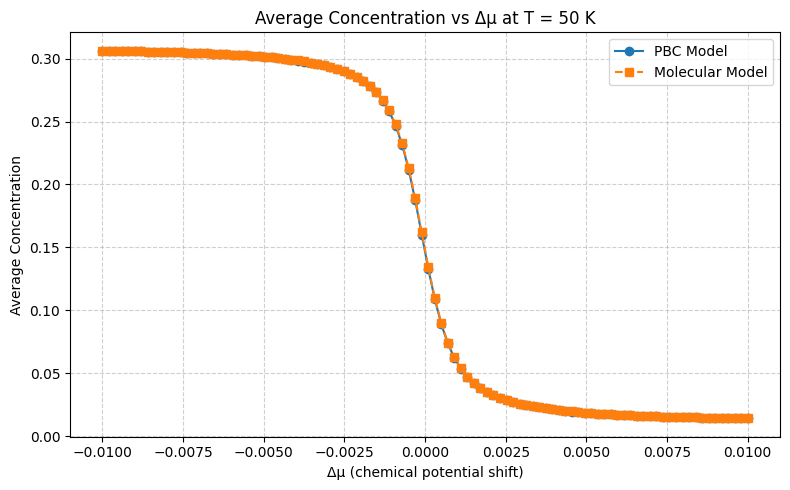

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(mu_range, av_conc_classical_pbc, label='PBC Model', marker='o', linestyle='-')
plt.plot(mu_range, av_conc_classical_mol, label='Molecular Model', marker='s', linestyle='--')

plt.xlabel("Δμ (chemical potential shift)")
plt.ylabel("Average Concentration")
plt.title(f"Average Concentration vs Δμ at T = {T} K")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

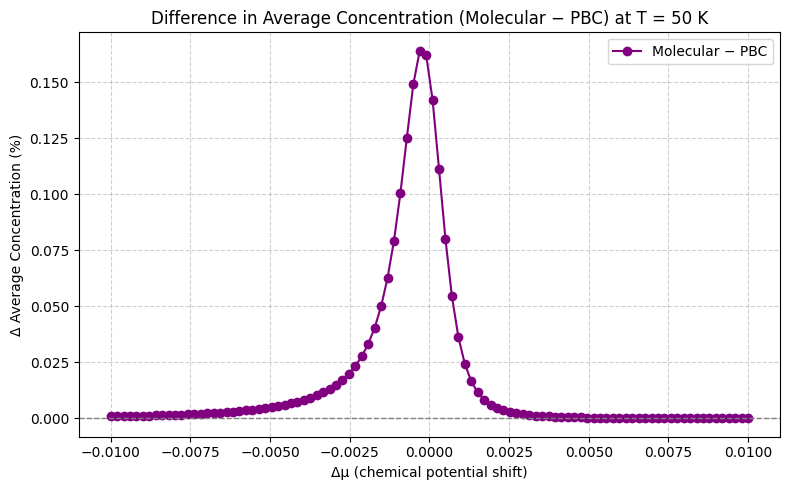

In [8]:
# Calculate the difference
delta_conc = (np.array(av_conc_classical_mol) - np.array(av_conc_classical_pbc))*100

# Plot the difference
plt.figure(figsize=(8, 5))
plt.plot(mu_range, delta_conc, label='Molecular − PBC', color='purple', marker='o')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Δμ (chemical potential shift)")
plt.ylabel("Δ Average Concentration (%)")
plt.title(f"Difference in Average Concentration (Molecular − PBC) at T = {T} K")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

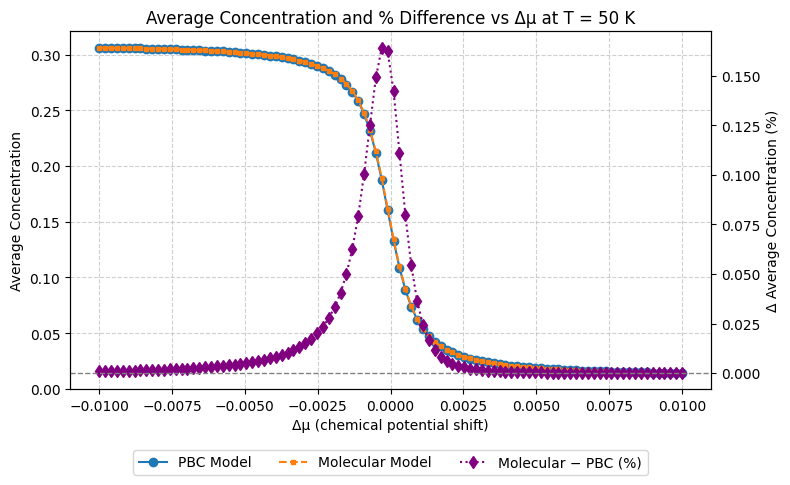

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure data are NumPy arrays
mu_range = np.array(mu_range)
av_conc_classical_pbc = np.array(av_conc_classical_pbc)
av_conc_classical_mol = np.array(av_conc_classical_mol)
delta_conc = (av_conc_classical_mol - av_conc_classical_pbc) * 100

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot average concentrations on primary y-axis
line1 = ax1.plot(mu_range, av_conc_classical_pbc, label='PBC Model', marker='o', linestyle='-')
line2 = ax1.plot(mu_range, av_conc_classical_mol, label='Molecular Model', marker='s', linestyle='--', 
                 markersize=3)
ax1.set_xlabel("Δμ (chemical potential shift)")
ax1.set_ylabel("Average Concentration")
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot percent difference on secondary y-axis
ax2 = ax1.twinx()
line3 = ax2.plot(mu_range, delta_conc, label='Molecular − PBC (%)',
                 color='purple', marker='d', linestyle=':')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_ylabel("Δ Average Concentration (%)")

# Combine legends from both axes
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.title(f"Average Concentration and % Difference vs Δμ at T = {T} K")
fig.tight_layout()
plt.show()

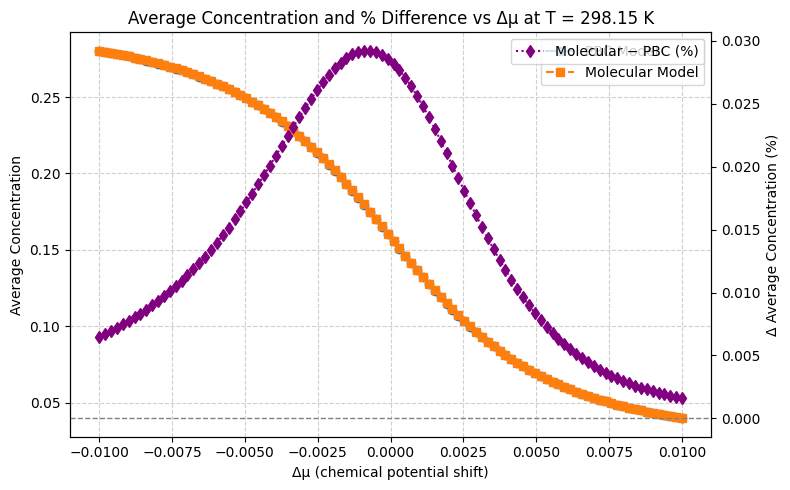

In [253]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to arrays if not already
mu_range = np.array(mu_range)
av_conc_classical_pbc = np.array(av_conc_classical_pbc)
av_conc_classical_mol = np.array(av_conc_classical_mol)

# Difference in percent
delta_conc = (av_conc_classical_mol - av_conc_classical_pbc) * 100

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary y-axis: average concentrations
ax1.plot(mu_range, av_conc_classical_pbc, label='PBC Model', marker='o', linestyle='-')
ax1.plot(mu_range, av_conc_classical_mol, label='Molecular Model', marker='s', linestyle='--')
ax1.set_xlabel("Δμ (chemical potential shift)")
ax1.set_ylabel("Average Concentration")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right')

# Secondary y-axis: percent difference
ax2 = ax1.twinx()
ax2.plot(mu_range, delta_conc, label='Molecular − PBC (%)', color='purple', marker='d', linestyle=':')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_ylabel("Δ Average Concentration (%)")
ax2.legend(loc='upper right')

plt.title("Average Concentration and % Difference vs Δμ at T = 298.15 K")
fig.tight_layout()
plt.show()

### Distribution
Add symmetrise?

In [243]:
mu_index = 50

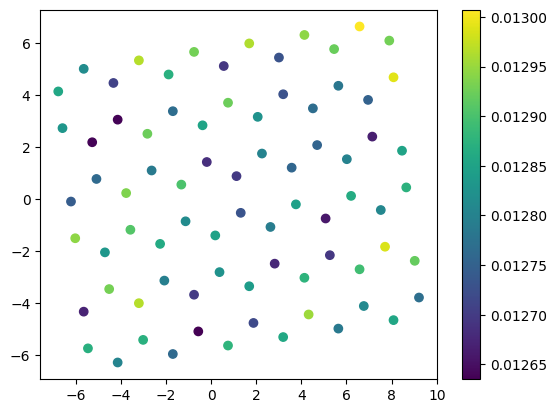

In [276]:
avg_density = pi_mol_all[mu_index][:, np.newaxis] * np.array(all_ones)
avg_density = np.sum(avg_density,axis=0)/np.sum(avg_density)
marksize = 1000

coords_x = graphene_mol.cart_coords[:,0]
coords_y = graphene_mol.cart_coords[:,1]
# plt.scatter(coords_x, coords_y, s=marksize * avg_density, c=avg_density)
plt.scatter(coords_x, coords_y,  c=avg_density)
plt.colorbar()


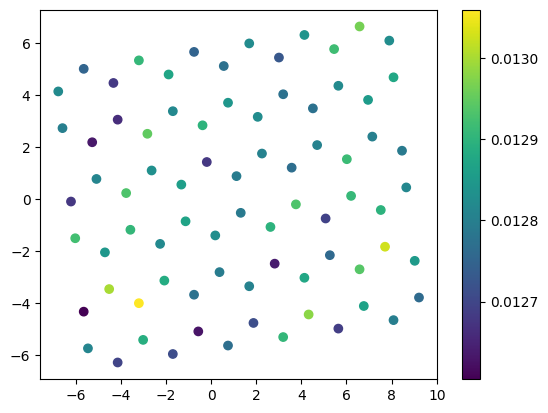

In [286]:
# Convert all_ones to NumPy array
all_ones_array = np.array(all_ones)  # shape: (num_samples, num_features)

# Stack or use all pi vectors: shape (num_mu, num_samples)
pi_all = np.array(pi_pbc_all)  # shape: (num_mu, num_samples)

# Reshape for broadcasting: (num_mu, num_samples, 1)
pi_expanded = pi_all[:, :, np.newaxis]

# Element-wise multiply with all_ones: (num_mu, num_samples, num_features)
weighted = pi_expanded * all_ones_array[np.newaxis, :, :]

# Sum over both mu and sample axes, normalize
avg_density = np.sum(weighted, axis=(0, 1)) / np.sum(weighted)
marksize = 1000

coords_x = graphene_mol.cart_coords[:,0]
coords_y = graphene_mol.cart_coords[:,1]
# plt.scatter(coords_x, coords_y, s=marksize * avg_density, c=avg_density)
plt.scatter(coords_x, coords_y,  c=avg_density)
plt.colorbar()


#### Differences

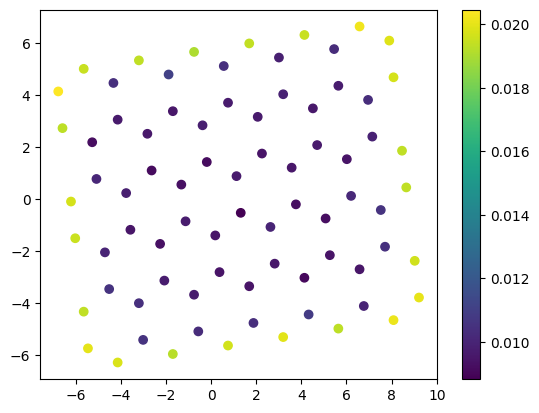

In [ ]:
# pi_pbc_all_diff = pi_pbc_all[mu_index]-pi_mol_all[mu_index]
# avg_density = pi_pbc_all_diff[:, np.newaxis] * np.array(all_ones)
# avg_density = np.sum(avg_density,axis=0)/np.sum(avg_density)
# marksize = 1000000

# coords_x = graphene_mol.cart_coords[:,0]
# coords_y = graphene_mol.cart_coords[:,1]
# # plt.scatter(coords_x, coords_y, s=marksize * avg_density, c=avg_density)
# plt.scatter(coords_x, coords_y, c=avg_density)

# plt.colorbar()


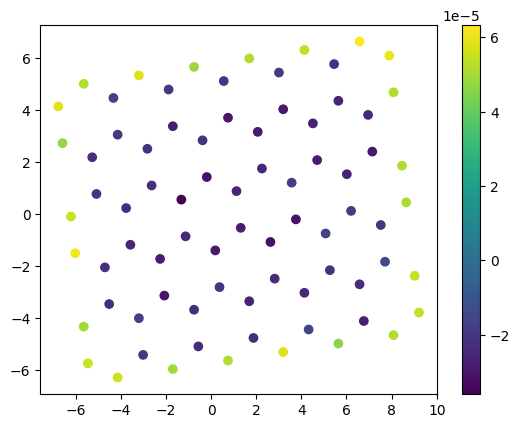

In [336]:
diff_all = []

for j in range(len(mu_range)):
    weighted_pbc = np.array([p * all_ones_array[i] for i, p in enumerate(pi_pbc_all[j])])
    weighted_mol = np.array([p * all_ones_array[i] for i, p in enumerate(pi_mol_all[j])])

    norm_pbc = np.sum(weighted_pbc, axis=0) / np.sum(weighted_pbc)
    norm_mol = np.sum(weighted_mol, axis=0) / np.sum(weighted_mol)

    diff_all.append(norm_mol - norm_pbc)

diff_all = np.array(diff_all)
avg_density = np.mean(diff_all, axis=0)

marksize = 1000000

coords_x = graphene_mol.cart_coords[:,0]
coords_y = graphene_mol.cart_coords[:,1]
# plt.scatter(coords_x, coords_y, s=marksize * avg_density, c=avg_density)
plt.scatter(coords_x, coords_y, c=avg_density)

plt.colorbar()



## Parity plot

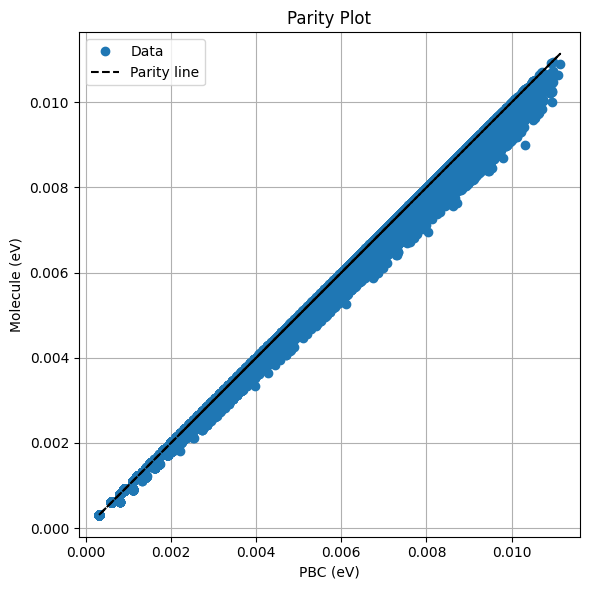

In [166]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(Ryd_classical_E_pbc)  # reference
y = np.array(Ryd_classical_E_mol)  # predicted

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, x, 'k--', label='Parity line')  # y = x line
plt.xlabel('PBC (eV)')
plt.ylabel('Molecule (eV)')
plt.title('Parity Plot')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

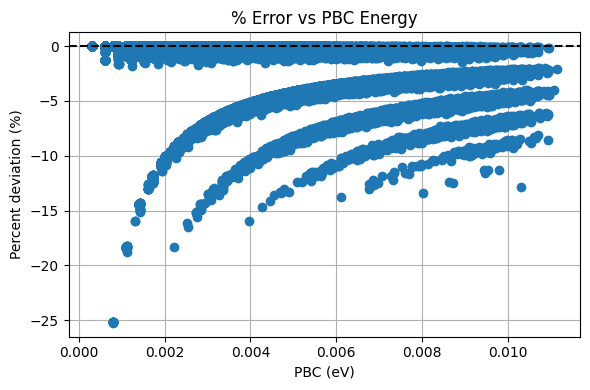

2025-06-11 18:02:38.871 python[5119:30162567] +[IMKClient subclass]: chose IMKClient_Modern
2025-06-11 18:02:38.871 python[5119:30162567] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [167]:
percent_diff = 100 * (y - x) / x

plt.figure(figsize=(6, 4))
plt.plot(x, percent_diff, 'o')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('PBC (eV)')
plt.ylabel('Percent deviation (%)')
plt.title('% Error vs PBC Energy')
plt.grid(True)
plt.tight_layout()
plt.show()